## PROBLEM STATEMENT

A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data-based approach. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management decide regarding potential players.

<h2>Data Preprocessing:</h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


####  The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. 

<h3> Drop any columns that you deem unnecessary for analysis. </h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [4]:
df.shape

(18207, 60)

In [5]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

#### Upon analysing the entire dataset, the columns "Photo", Flag", "Club Logo",  "Jersey Number” doesn’t contribute much on our analysis. Hence, they are dropped.

In [6]:
data = df.drop(["Photo","Flag","Club Logo", "Jersey Number"],axis=1)
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
data.shape

(18207, 56)

<h3> The following columns need to be converted for further analysis</h3>

<strong>1. Convert "Value" column to Float after getting rid of currency symbol and suffix.</strong>

In [8]:
data['Value'].isnull().sum()

0

In [9]:
data['Value'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data['Value']=data['Value'].map(eval)
data['Value'].head()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [10]:
data['Value'].dtype

dtype('float64')

#### As the attribute 'Value' doesn't have any missing values, we converted the column to float type by replacing the currency symbols and suffix accordingly. 

<strong>2. Convert "Wage" column to Float after getting rid of currency symbol and suffix.</strong>

In [11]:
data['Wage'].isnull().sum()

0

In [12]:
data['Wage'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data['Wage']=data['Wage'].map(eval)
data['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

In [13]:
data['Wage'] = data['Wage'].astype(float)
data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [14]:
data['Wage'].dtype

dtype('float64')

#### As the attribute 'Wage' doesn't have any missing values, we converted the column to float type by replacing the currency symbols and suffix accordingly. 

<strong>3. Convert "Joined" column to int with only year</strong>

In [15]:
data["Joined"].isnull().sum()

1553

In [16]:
100*(data["Joined"].isnull().sum()/len(data.index))

8.529686384357664

#### The attribute 'Joined' has approximately 8.5% of the values missing in it. We are imputing the missing values with mode as the type of this attribute is object, therefore, mean imputation doesn't fit well. 

In [17]:
data['Joined'].fillna(data['Joined'].mode()[0],inplace=True)

In [18]:
data["Joined"].isnull().sum()

0

In [19]:
data['Joined']=pd.DatetimeIndex(data['Joined']).year
data['Joined'].head()

0    2004
1    2018
2    2017
3    2011
4    2015
Name: Joined, dtype: int64

In [20]:
data['Joined'].dtype

dtype('int64')

####  The attribute 'Joined' is converted to 'int' data type from the original 'object' type with displaying only the year. 

<strong>4. Convert "Contract Valid Until" column to datetime type</strong>

In [21]:
data['Contract Valid Until'].isnull().sum()

289

In [22]:
100*(data["Contract Valid Until"].isnull().sum()/len(data.index))

1.5873015873015872

#### The attribute 'Contract Valid Until' has approximately 1.5% of the values missing in it. We are imputing the missing values with mode as the type of this attribute is object, therefore, mean imputation doesn't fit well.

In [23]:
data['Contract Valid Until'].fillna(data['Contract Valid Until'].mode()[0],inplace=True)

In [24]:
data['Contract Valid Until'].isnull().sum()

0

In [25]:
data['Contract Valid Until']= pd.to_datetime(data['Contract Valid Until'])
data['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

#### The attribute 'Contract Valid Until' is converted from 'object' type to 'datetime' type

<strong>5. Convert "Height" column to Float with decimal points</strong>

In [26]:
data["Height"] = data["Height"].replace({"'": '.'}, regex=True).astype(float)
data["Height"].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [27]:
data["Height"].dtype

dtype('float64')

#### The attribute 'Height' is converted from 'object' type to 'float' type

<strong>6. Remove the suffix in 'Weight' column and convert to float</strong>

In [28]:
data["Weight"] = data["Weight"].replace({"lbs": ''}, regex=True).astype(float)
data["Weight"].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [29]:
data["Weight"].dtype

dtype('float64')

#### The attribute 'Weight' is converted from 'object' type to 'float' type

<strong>7. Convert 'Release Clause' column to Float after getting rid of currency symbol and suffix. </strong>

In [30]:
data["Release Clause"].isnull().sum()

1564

In [31]:
100*(data["Release Clause"].isnull().sum()/len(data.index))

8.590102707749766

#### The attribute 'Release Clause' has approximately 8.5% of the values missing in it. 

#### Before filling the missing values, we are creating a copy of the column and dropping the null values.

In [32]:
Dropped_Null_Release_Clause =data['Release Clause'].dropna()
Dropped_Null_Release_Clause.head()

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

#### Outliers are present in Release Clause. Hence, we are going with median imputation.

In [33]:
Nonull_Release = Dropped_Null_Release_Clause.replace({'€':'','K':'*10**3','M':'*10**6'},
                                                     regex=True).map(eval).median()
Nonull_Release

1100000.0

In [34]:
data['Release Clause'].fillna('1100000.0',inplace=True)
data['Release Clause'].isnull().sum()

0

In [35]:
data['Release Clause'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data['Release Clause']=data['Release Clause'].map(eval)
data['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

<h3> Check for missing values and do a mean imputation where necessary </h3>

In [36]:
data.isnull().sum().sort_values(ascending=False)

Loaned From                 16943
Club                          241
Position                       60
FKAccuracy                     48
Agility                        48
Dribbling                      48
Curve                          48
Composure                      48
LongPassing                    48
BallControl                    48
Acceleration                   48
SprintSpeed                    48
Reactions                      48
ShortPassing                   48
Balance                        48
ShotPower                      48
Jumping                        48
Stamina                        48
Strength                       48
LongShots                      48
Aggression                     48
Interceptions                  48
Positioning                    48
Volleys                        48
Finishing                      48
HeadingAccuracy                48
Penalties                      48
GKReflexes                     48
GKPositioning                  48
GKKicking     

### COLUMN: 'Loaned From'

In [37]:
100* (data['Loaned From'].isnull().sum()/len(data.index))

93.05761520294392

In [38]:
data.drop(columns='Loaned From', inplace=True)
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


#### As the column 'Loaned From' has over 93% of the observations missing, we are dropping it as it can be better to drop those cases rather than do imputation and replace them.

### COLUMN: 'Height'

In [39]:
data['Height'].isnull().sum()

48

#### As there are 48 missing values in the 'Height' attribute, we are imputing them with mean/median as it is in numeric datatype.

<AxesSubplot:xlabel='Height'>

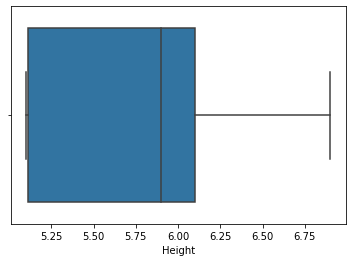

In [40]:
sns.boxplot(data['Height'])

#### No outliers. Hence, mean imputation.

In [41]:
Height_mean = data['Height'].mean()
Height_mean

5.797367145768057

In [42]:
data['Height'].fillna(Height_mean,inplace=True)
data['Height'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

In [43]:
data['Height'].isnull().sum()

0

### COLUMN: 'Weight'

In [44]:
data['Weight'].isnull().sum()

48

#### As there are 48 missing values in the 'Weight' attribute, we are imputing them with mean/median as it is in numeric datatype.


<AxesSubplot:xlabel='Weight'>

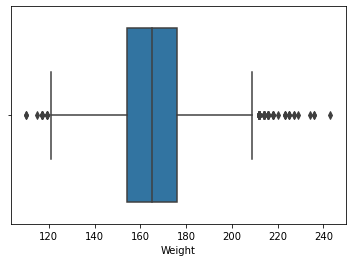

In [45]:
sns.boxplot(data['Weight'])

#### Outliers found. Hence, Median imputation.

In [46]:
Weight_median = data['Weight'].median()
Weight_median

165.0

In [47]:
data['Weight'].fillna(Weight_median,inplace=True)
data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [48]:
data['Weight'].isnull().sum()

0

In [49]:
data.isnull().sum().sort_values(ascending=False)

Club                        241
Position                     60
FKAccuracy                   48
SprintSpeed                  48
Volleys                      48
Dribbling                    48
Curve                        48
Vision                       48
LongPassing                  48
BallControl                  48
Acceleration                 48
Agility                      48
HeadingAccuracy              48
Reactions                    48
Balance                      48
ShotPower                    48
Jumping                      48
Stamina                      48
Strength                     48
LongShots                    48
Aggression                   48
ShortPassing                 48
Finishing                    48
Positioning                  48
International Reputation     48
GKReflexes                   48
GKPositioning                48
GKKicking                    48
GKHandling                   48
GKDiving                     48
SlidingTackle                48
Preferre

#### On conducting a self-analysis, we are concluding that majority of the columns has exactly '48 values' missing. Hence, we are dropping those values, if and only if, there are all of the same row.

In [50]:
data.shape

(18207, 55)

In [51]:
data.dropna(subset=[ 'Stamina'],inplace=True)

In [52]:
data.isnull().sum().sort_values(ascending=False)

Club                        241
Position                     12
ID                            0
SprintSpeed                   0
Agility                       0
Reactions                     0
Balance                       0
ShotPower                     0
Jumping                       0
Stamina                       0
Strength                      0
LongShots                     0
Aggression                    0
Interceptions                 0
Positioning                   0
BallControl                   0
Vision                        0
Penalties                     0
Composure                     0
Marking                       0
StandingTackle                0
SlidingTackle                 0
GKDiving                      0
GKHandling                    0
GKKicking                     0
GKPositioning                 0
GKReflexes                    0
Acceleration                  0
FKAccuracy                    0
LongPassing                   0
Name                          0
Age     

In [53]:
data.shape

(18159, 55)

<h2>Exploratory Analysis:</h2>

<h3> Plot the distribution of Overall rating for all players </h3>

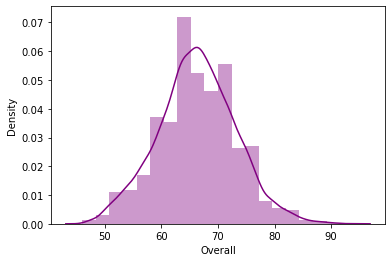

In [54]:
sns.distplot(data['Overall'], bins=20, kde=True, color="purple")
plt.show()

<strong> 2. Generate pair plots for the following variables: (3 marks)<br>
          Overall, Value, Wage, International Reputation, Height, Weight, Release Clause</strong>


In [55]:
Pair_Plots = data[["Overall", "Value", "Wage", "International Reputation", "Height", "Weight", "Release Clause"]]
Pair_Plots.head()

,Overall,Value,Wage,International Reputation,Height,Weight,Release Clause
0,94,110500000.0,565000.0,5.0,5.70,159.0,226500000.0
1,94,77000000.0,405000.0,5.0,6.20,183.0,127100000.0
2,92,118500000.0,290000.0,5.0,5.90,150.0,228100000.0
3,91,72000000.0,260000.0,4.0,6.40,168.0,138600000.0
4,91,102000000.0,355000.0,4.0,5.11,154.0,196400000.0


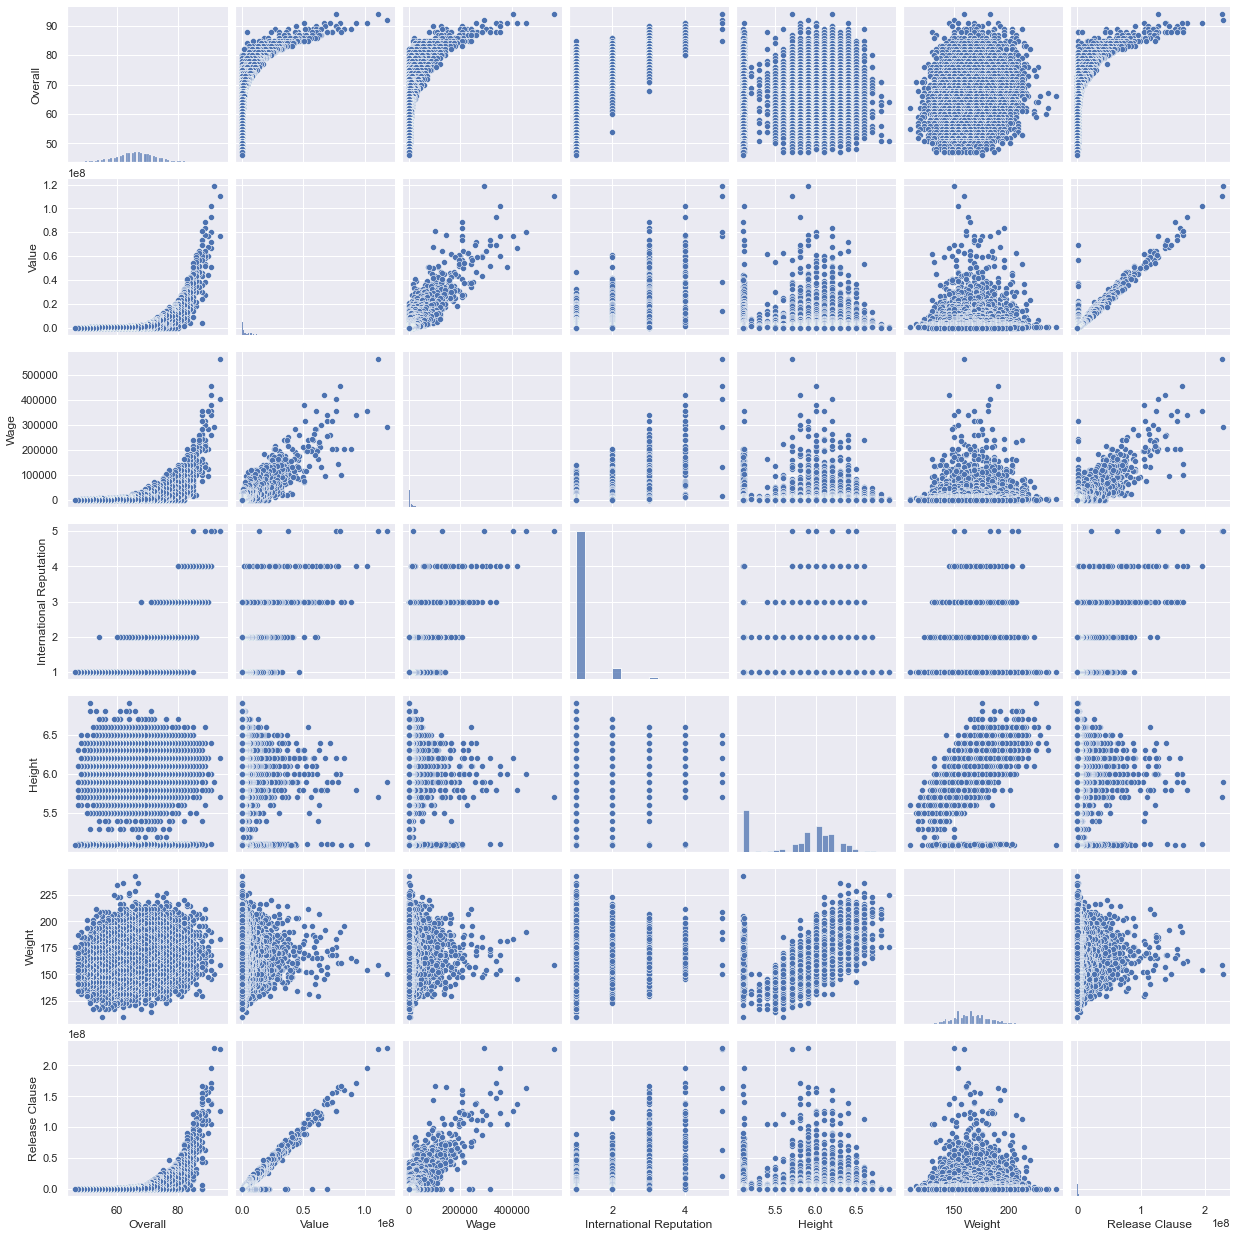

In [56]:
sns.set()
sns.pairplot(Pair_Plots)
plt.show()

<strong>3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020. (3 marks)</strong>

In [57]:
Top_20_Players = data.loc[data["Contract Valid Until"]=="2020"].sort_values(by='Overall',ascending=False).head(20)
Top_20_Players.head(25)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


<strong>a) What would the average wage for this set of players be?</strong>

In [74]:
Top_20_Players["Wage"].mean()

205450.0

<strong>b) What is the average age?</strong>

In [75]:
Top_20_Players["Age"].mean()

30.65

<strong>c) Is there a correlation between the Overall rating and Value for these players?</strong>

In [76]:
Corr_Overall_Value = data[["Overall","Value"]]
Corr_Overall_Value.corr()

,Overall,Value
Overall,1.000000,0.626913
Value,0.626913,1.000000


<AxesSubplot:>

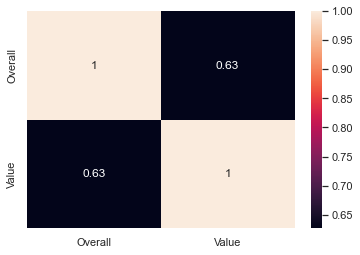

In [77]:
sns.heatmap(Corr_Overall_Value.corr(),annot=True)

<strong>4. Convert the categorical features to numerical features with suitable encoding techniques. (4 marks)</strong>

In [79]:
data.select_dtypes(object).head()

,Name,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,L. Messi,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF
1,Cristiano Ronaldo,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST
2,Neymar Jr,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,LW
3,De Gea,Spain,Manchester United,Right,Medium/ Medium,Lean,GK
4,K. De Bruyne,Belgium,Manchester City,Right,High/ High,Normal,RCM


### Label Encoding - Column: 'Position'

In [83]:
data['Position'].nunique()

27

In [84]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Encoded_data = data.copy(deep=True)
Encoded_data['Position'] = labelencoder.fit_transform(Encoded_data['Position'])
Encoded_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


### n-1 Encoding - Column: 'Body Type'

In [85]:
data['Body Type'].nunique()

10

In [86]:
Encoded_data = data.copy(deep=True)
Encoded_data = pd.get_dummies(Encoded_data,columns=['Body Type'], drop_first=True)
Encoded_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Release Clause,Body Type_C. Ronaldo,Body Type_Courtois,Body Type_Lean,Body Type_Messi,Body Type_Neymar,Body Type_Normal,Body Type_PLAYER_BODY_TYPE_25,Body Type_Shaqiri,Body Type_Stocky
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,226500000.0,0,0,0,1,0,0,0,0,0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,127100000.0,1,0,0,0,0,0,0,0,0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,228100000.0,0,0,0,0,1,0,0,0,0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,138600000.0,0,0,1,0,0,0,0,0,0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,196400000.0,0,0,0,0,0,1,0,0,0


### Ordinal Encoding - Column: 'Work Rate'

In [87]:
data['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low'], dtype=object)

In [88]:
from sklearn.preprocessing import OrdinalEncoder
ordEncoder = OrdinalEncoder(categories=[['High/ High', 'High/ Medium','High/ Low','Medium/ High',
                                         'Medium/ Medium','Medium/ Low', 'Low/ High', 'Low/ Medium', 'Low/ Low']])
Encoded_data = data.copy(deep=True)
Encoded_data['Ordinal_Work_Rate']= ordEncoder.fit_transform(Encoded_data['Work Rate'].values.reshape(-1,1))
Encoded_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Ordinal_Work_Rate
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,4.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,1.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,4.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,0.0


### One Hot Encoding - Column: 'Preferred Foot'

In [89]:
data['Preferred Foot'].nunique()

2

In [90]:
Encoded_data = data.copy(deep=True)
Encoded_data = pd.get_dummies(Encoded_data,columns=['Preferred Foot']) 
Encoded_data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,International Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Preferred Foot_Left,Preferred Foot_Right
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,5.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,1,0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,0,1
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,0,1
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,4.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,0,1
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,0,1


<strong> Generate tables containing the top 5 players by Overall rating for each unique position</strong>

In [60]:
Top_5_Position = data.groupby(by='Position')['Position','Overall'].head(5)
Top_5_Position.sort_values(['Position','Overall'],ascending=[True,False]).head(50)

,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
12,CB,90
42,CB,87
73,CB,86
89,CB,85
102,CB,85


<strong>a) Are there any players appearing in more than one Table. Please point out such players.</strong>

In [93]:
names = data['Name'].value_counts()
names[names > 1]

J. Rodríguez    11
Paulinho         8
R. Williams      7
J. Williams      7
J. Valencia      6
                ..
J. Jiménez       2
E. Bajrami       2
L. Maniero       2
B. Moore         2
R. Henry         2
Name: Name, Length: 758, dtype: int64

<strong>b) What is the average wage one can expect to pay for the top 5 in every position?</strong>

In [94]:
data = data.sort_values(by='Overall')
top_5 = data.groupby('Position')
top_5.mean()['Wage']

Position
CAM    10229.645094
CB      7704.724409
CDM     9315.400844
CF     10216.216216
CM      8340.746055
GK      6803.950617
LAM    26142.857143
LB      8726.928896
LCB    11498.456790
LCM    14131.645570
LDM    11860.082305
LF     44666.666667
LM      9656.621005
LS     15260.869565
LW     13068.241470
LWB     9076.923077
RAM    19095.238095
RB      8604.182804
RCB    12688.821752
RCM    14404.092072
RDM    12149.193548
RF     52687.500000
RM      9540.925267
RS     14379.310345
RW     14432.432432
RWB     8597.701149
ST      9938.197026
Name: Wage, dtype: float64